In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/NetflixViewingHistory.csv')

# Show the first 5 rows of the dataset
df.head()

,Title,Date,Duration
0,Breaking Bad: Season 1: Episode 1,2024-01-10,58 min
1,Breaking Bad: Season 1: Episode 2,2024-01-11,47 min
2,Breaking Bad: Season 1: Episode 3,2024-01-11,47 min
3,The Office (US): Season 2: Episode 5,2024-01-15,22 min
4,The Office (US): Season 2: Episode 6,2024-01-15,21 min


In [2]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Duration' from string (like "58 min") to integer (58)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

# Create new columns: 'Year', 'Month', 'Day', 'Weekday'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# Show updated data
df.head()

,Title,Date,Duration,Year,Month,Day,Weekday
0,Breaking Bad: Season 1: Episode 1,2024-01-10,58,2024,1,10,Wednesday
1,Breaking Bad: Season 1: Episode 2,2024-01-11,47,2024,1,11,Thursday
2,Breaking Bad: Season 1: Episode 3,2024-01-11,47,2024,1,11,Thursday
3,The Office (US): Season 2: Episode 5,2024-01-15,22,2024,1,15,Monday
4,The Office (US): Season 2: Episode 6,2024-01-15,21,2024,1,15,Monday


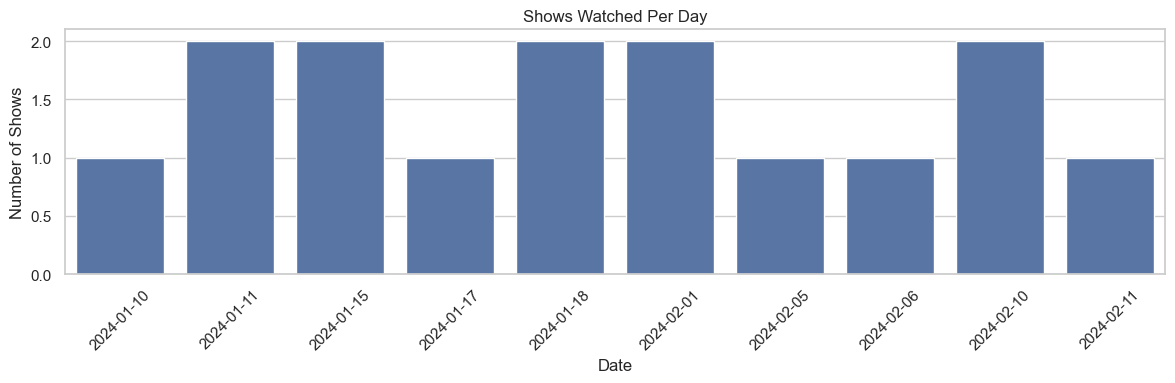

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot number of shows watched per day
plt.figure(figsize=(12, 4))
sns.countplot(x="Date", data=df, order=df["Date"].value_counts().index.sort_values())
plt.xticks(rotation=45)
plt.title("Shows Watched Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15088\2953428050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Label', y='Watch Count', data=monthly_trend, palette='coolwarm')


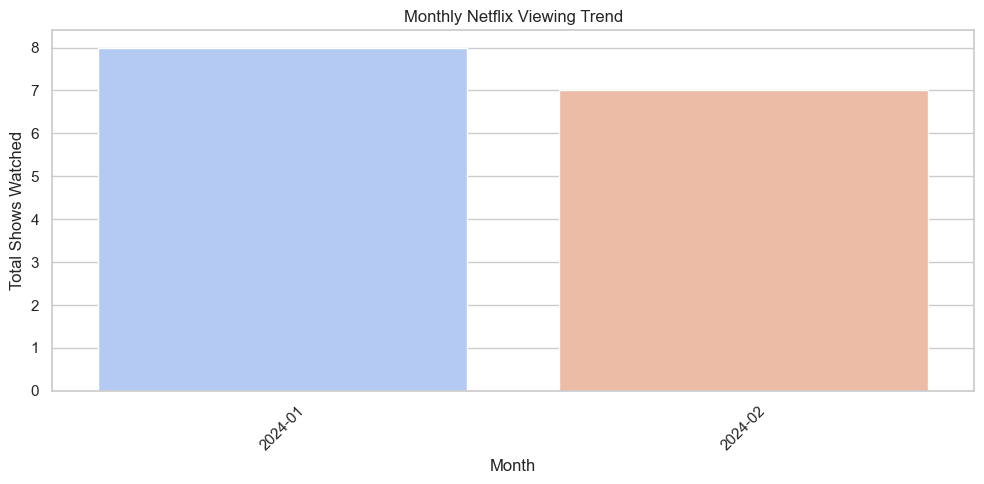

In [4]:
# Group by Year and Month, then count the number of shows watched
monthly_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Watch Count')

# Combine Year and Month into a single label for X-axis
monthly_trend['Month_Label'] = monthly_trend['Year'].astype(str) + '-' + monthly_trend['Month'].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Month_Label', y='Watch Count', data=monthly_trend, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Monthly Netflix Viewing Trend")
plt.xlabel("Month")
plt.ylabel("Total Shows Watched")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15088\3933306849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_shows.values, y=top_shows.index, palette='viridis')


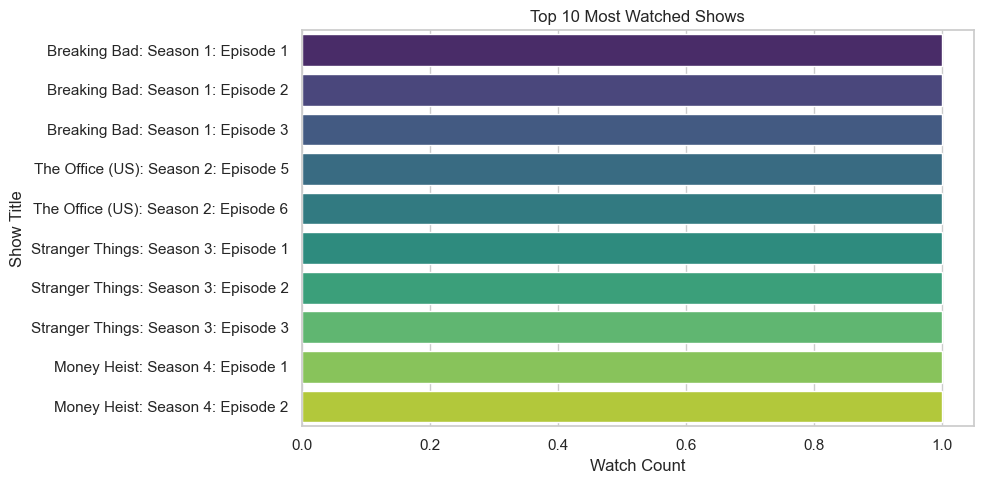

In [5]:
# Count how many times each show appears in the Title column
top_shows = df['Title'].value_counts().head(10)

# Plot the top 10 most watched shows
plt.figure(figsize=(10, 5))
sns.barplot(x=top_shows.values, y=top_shows.index, palette='viridis')
plt.title("Top 10 Most Watched Shows")
plt.xlabel("Watch Count")
plt.ylabel("Show Title")
plt.tight_layout()
plt.show()

In [6]:
# Total watch time in minutes
total_minutes = df['Duration'].sum()
print(f"📺 Total Watch Time: {total_minutes} minutes")

# Convert to hours
total_hours = total_minutes / 60
print(f"⏱️ Which is around: {total_hours:.2f} hours")

📺 Total Watch Time: 631 minutes
⏱️ Which is around: 10.52 hours


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15088\3327895186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='magma')


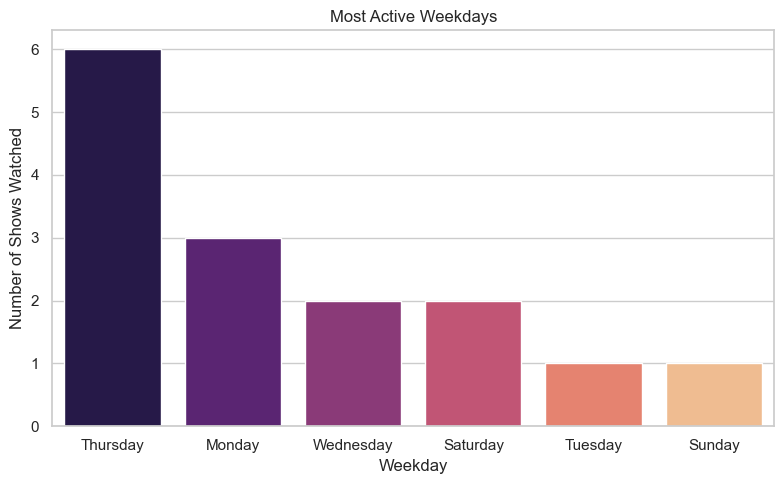

In [7]:
# Count views per weekday
weekday_counts = df['Weekday'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='magma')
plt.title("Most Active Weekdays")
plt.xlabel("Weekday")
plt.ylabel("Number of Shows Watched")
plt.tight_layout()
plt.show()

## 🔚 Netflix Viewing Pattern Summary

- ✅ Loaded viewing history CSV file and cleaned it
- 📅 Analyzed daily and monthly watch patterns
- 📈 Visualized watch trends by date and weekday
- 🎬 Identified top 10 most-watched shows
- ⏱️ Calculated total watch time in minutes and hours
- 📊 Found most active viewing days by weekday

> This project helped visualize streaming behavior clearly and can be extended with more data in the future.